In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mnist_utils as mu
import random
import pyNN.nest as p
import relu_utils as alg
import spiking_relu as sr
import copy

In [2]:
cell_params_lif = {'cm': 0.25,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 1.,
                   'tau_syn_E': 1.0,
                   'tau_syn_I': 1.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

In [3]:
def noiseI(x, stdnoise, cell_params_lif):
    p.setup(timestep=1.0, min_delay=1.0, max_delay=16.0)
    run_s = 10.
    runtime = 1000. * run_s
    max_rate = 1000.
    #step = .1
    #x = np.arange(0., 1., step)
    count = 0
    pop_list=[]
    for i in x:
        noise = p.NoisyCurrentSource(mean=i, stdev=stdnoise, start=0, stop=runtime, dt=1.0,rng=p.NativeRNG(seed=0))
        pop = p.Population(1, p.IF_curr_exp, cell_params_lif)
        noise.inject_into(pop)
        pop_list.append(pop)
        pop.record()
        count += 1
    p.run(runtime)
    rate_I = np.zeros(count)
    for i in range(count):
        spikes = pop_list[i].getSpikes(compatible_output=True)
        rate_I[i] = len(spikes)/run_s
    p.end()
    return rate_I

In [4]:
def softplus(x, xscale=10.):
    a = 0.2
    b = 5.
    y = a * np.log(1.+ np.exp(x * b * xscale))
    #y = np.log(1.+np.exp(x*10.))
    #y = y - a * np.log(2)
    return y

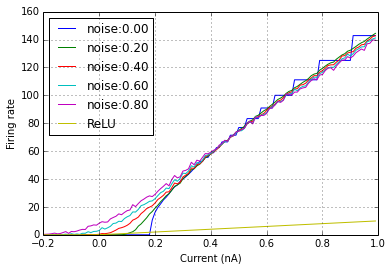

In [5]:
step = .01
x = np.arange(-0.2, 1., step)
rate_list=[]
for stdnoise in np.arange(0.,1.,0.2):
    rate = noiseI(x, stdnoise,cell_params_lif)
    rate_list.append(rate)
    plt.plot(x, rate, label='noise:%.2f'%stdnoise,)
plt.grid('on')

plt.xlabel('Current (nA)')
plt.ylabel('Firing rate')
plt.plot(x, softplus(x), label='ReLU')
plt.legend(loc='upper left') #, shadow=True
#plt.savefig('noise.pdf')


0.149


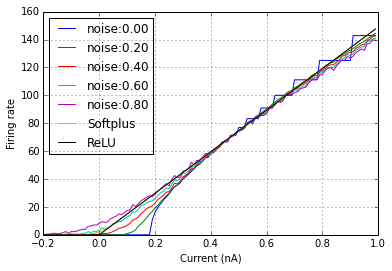

In [13]:
plt.clf()
scale = rate_list[2][70]/(softplus(x[70]))

for i in range(len(rate_list)):
    plt.plot(x, rate_list[i], label='noise:%.2f'%(i*0.2),)
plt.plot(x, scale*softplus(x), label='Softplus')
y = rate_list[2][70]/0.5 * x
y[y<=0]=0
plt.plot(x, y, label = 'ReLU')
plt.grid('on')
plt.xlabel('Current (nA)')
plt.ylabel('Firing rate')
plt.legend(loc='upper left') #, shadow=True
print rate_list[2][70]/0.5/1000.

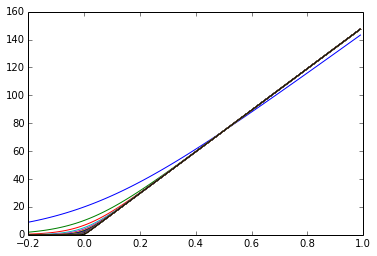

In [17]:
for xscale in range(1,50):
    scale = rate_list[2][70]/(softplus(x[70], xscale))
    #sclae = 1
    plt.plot(x, softplus(x,xscale)*scale)

In [24]:
def softplus_ab(x, a=0.2, b=5.):
    y = a * np.log(1.+ np.exp(x * b))
    #y = np.log(1.+np.exp(x*10.))
    #y = y - a * np.log(2)
    return y

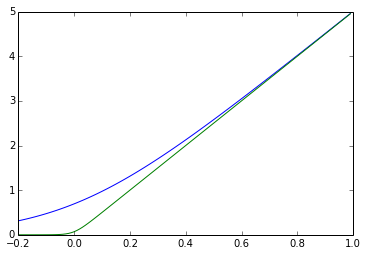

In [29]:
plt.plot(x, 10. *softplus_ab(x, a=0.1))
plt.plot(x,  softplus_ab(x, a=0.1, b=50.))

In [23]:
0.2* np.log(2)

0.13862943611198905